In [1]:
import torch
import pandas as pd
import os

from pathlib import Path
import matplotlib.pyplot as plt

from astropy.visualization import make_lupton_rgb

In [2]:
data_path = Path("/data/scratch/regier/m2_aug30/")

In [3]:
file_name = "dataset_0_size_1024.pt"

In [4]:
m2_data = torch.load(data_path / file_name)

In [5]:
m2_data[0].keys()

dict_keys(['images', 'psf_params', 'full_catalog'])

In [6]:
def create_rgb(image, bgr=[1, 2, 3], stretch=0.5, Q=2, scale=None):
    if scale is None:
        r_im = image[bgr[2]]  # for the r channel
        g_im = image[bgr[1]]  # for the g channel
        b_im = image[bgr[0]]  # for the b channel
    else:
        # manually re-scaling the images here
        r_im = image[bgr[2]] * scale[0]
        g_im = image[bgr[1]] * scale[1]
        b_im = image[bgr[0]] * scale[2]

    rgb = make_lupton_rgb(image_r=r_im,
                          image_g=g_im,
                          image_b=b_im,
                          stretch=stretch, Q=Q)
    # "stretch" and "Q" are parameters to stretch and scale the pixel values

    return rgb

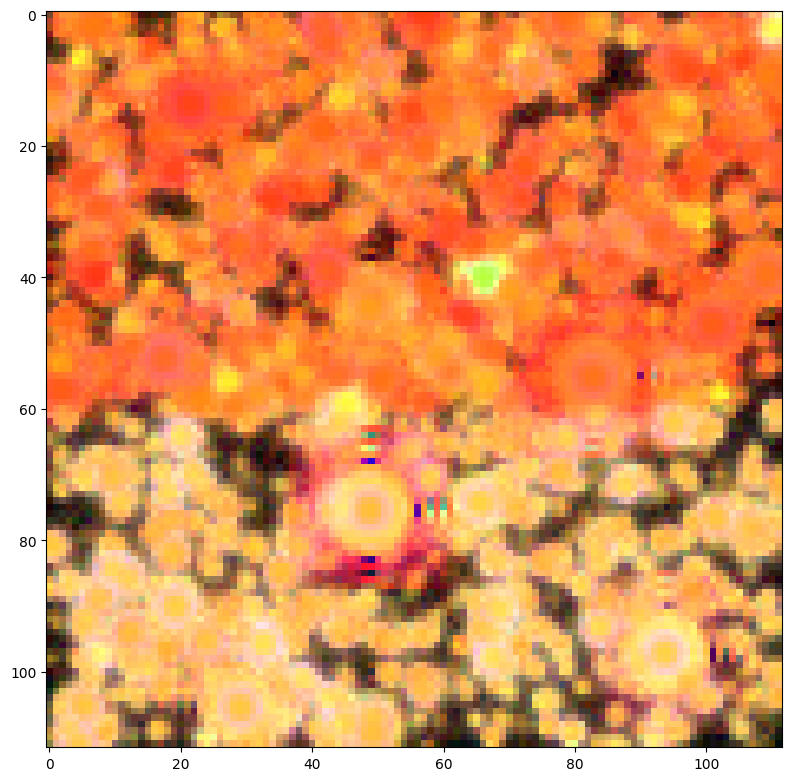

In [7]:
image = m2_data[0]["images"]
rgb_image = create_rgb(image, scale=[0.6, 0.7, 1.0], stretch=0.5, Q=2)

line_width = 1.0
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(rgb_image)
fig.tight_layout()
plt.show()

In [8]:
q = torch.tensor([0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99, 0.999, 0.9999])
all_fluxes = torch.cat([m["full_catalog"]["fluxes"] for m in m2_data], dim=0)
print(f"max flux: {all_fluxes.amax(dim=0)}")
flux_q = all_fluxes.quantile(q=q, dim=0).permute([1, 0])
pd.DataFrame(flux_q, columns=q.tolist())

max flux: tensor([136357.8750,  19455.4062,   8033.5522,  54625.1875, 266777.4062])


,0.0010,0.0100,0.1000,0.2500,0.5000,0.7500,0.9000,0.9900,0.9990,0.9999
0,0.0,0.0,0.023369,0.077585,0.258385,0.909890,3.156005,41.440483,397.286011,2327.145996
1,0.0,0.0,0.119585,0.264520,0.684701,2.023903,6.202967,70.731750,619.766724,2837.856201
2,0.0,0.0,0.348879,0.656610,1.579929,4.371297,12.804317,139.696472,1207.598389,5174.216797
3,0.0,0.0,0.493196,1.053141,2.704083,7.969037,24.493782,274.402222,2376.999756,10809.089844
4,0.0,0.0,0.515957,1.234176,3.453681,10.911404,35.259544,416.207703,3592.029785,18457.783203


In [10]:
fluxes = []
for fn in os.listdir(data_path):
    if fn.endswith(".pt"):
        cur_d = torch.load(data_path / fn)
        for d in cur_d:
            fluxes.append(d["full_catalog"]["fluxes"])

In [12]:
fluxes = torch.cat(fluxes, dim=0)

In [13]:
fluxes.shape

torch.Size([644438528, 5])

In [15]:
torch.log1p(fluxes.amax(dim=0))

tensor([12.6369, 11.6092,  8.9919, 11.5487, 13.3546])

In [ ]:
psf = []
for fn in os.listdir(data_path):
    if fn.endswith(".pt"):
        cur_d = torch.load(data_path / fn)
        for d in cur_d:
            psf.append(d["psf_params"])

In [ ]:
psf = torch.stack(psf, dim=0)

In [ ]:
psf.shape

In [ ]:
torch.allclose(psf, psf[0:1].repeat([psf.shape[0], 1, 1]))